In [4]:
import random

class MartianGrid:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [['empty' for _ in range(width)] for _ in range(height)]
        self.rocks = []

    def populate_grid(self, num_rocks, num_rovers, num_aliens):
        if num_rocks + num_rovers + num_aliens > self.width * self.height:
            raise ValueError("Total number of objects exceeds grid size.")
        
        # Place rocks
        for _ in range(num_rocks):
            x = random.randint(0, self.width - 1)
            y = random.randint(0, self.height - 1)
            while self.grid[y][x] != 'empty':
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
            self.grid[y][x] = 'rock'
            self.rocks.append((x, y))  # Add rock coordinates to the rocks list

        # Place rovers
        for _ in range(num_rovers):
            x = random.randint(0, self.width - 1)
            y = random.randint(0, self.height - 1)
            while self.grid[y][x] != 'empty':
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
            self.grid[y][x] = 'rover'

        # Place aliens
        for _ in range(num_aliens):
            x = random.randint(0, self.width - 1)
            y = random.randint(0, self.height - 1)
            while self.grid[y][x] != 'empty':
                x = random.randint(0, self.width - 1)
                y = random.randint(0, self.height - 1)
            self.grid[y][x] = 'alien'

    def wrap_coordinates(self, x, y):
        # Wrap x coordinate around the grid edges
        x %= self.width
        # Wrap y coordinate around the grid edges
        y %= self.height
        return x, y

class Rover:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.battery = 100
        self.rock = None
        self.detected_rocks = []

    def move(self, direction, grid):
        directions = {'up': (0, -1), 'down': (0, 1), 'left': (-1, 0), 'right': (1, 0)}
        dx, dy = directions[direction]
        new_x = self.x + dx
        new_y = self.y + dy
        self.x, self.y = grid.wrap_coordinates(new_x, new_y)

    def scan(self, grid):
        self.detected_rocks = []
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                x, y = grid.wrap_coordinates(self.x + dx, self.y + dy)
                if grid.grid[y][x] == 'rock':
                    self.detected_rocks.append((x, y))
                elif grid.grid[y][x] == 'alien':
                    # Handle alien detection
                    pass

    def collect_rock(self, rock):
        self.rock = rock
        print("Rock collected by Rover.")

    def return_to_spacecraft(self, spacecraft, grid):
        if self.rock:
            distance_to_spacecraft = ((self.x - spacecraft.x) ** 2 + (self.y - spacecraft.y) ** 2) ** 0.5
            if distance_to_spacecraft <= 1:
                spacecraft.retrieve_rock(self)
                self.rock = None
            else:
                self.move_towards_spacecraft(spacecraft, grid)
        else:
            print("Rover doesn't have a rock to deposit.")

    def move_towards_spacecraft(self, spacecraft, grid):
        directions = ['up', 'down', 'left', 'right']
        dx = spacecraft.x - self.x
        dy = spacecraft.y - self.y
        if abs(dx) > abs(dy):
            if dx > 0:
                direction = 'right'
            else:
                direction = 'left'
        else:
            if dy > 0:
                direction = 'down'
            else:
                direction = 'up'
        self.move(direction, grid)

    def share_battery(self, other_rover):
        if self.battery > 0 and other_rover.battery < 100:
            battery_to_share = min(self.battery, 100 - other_rover.battery)
            self.battery -= battery_to_share
            other_rover.battery += battery_to_share
            print(f"Battery shared: {battery_to_share}% from Rover at ({self.x}, {self.y}) to Rover at ({other_rover.x}, {other_rover.y})")
        else:
            print("Battery sharing not possible.")

    def recharge(self):
        self.battery = 100
        print(f"Rover at ({self.x}, {self.y}) recharged.")

    def attacked_by_alien(self):
        self.battery -= 25
        print(f"Rover at ({self.x}, {self.y}) has been attacked. Energy remaining: {self.battery}%.")



class Spacecraft:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def retrieve_rock(self, rover):
        # Retrieve a rock from a rover
        if rover.rock:
            print(f"Rock retrieved from Rover at ({rover.x}, {rover.y}).")
            return rover.rock
        else:
            print("No rock to retrieve from Rover.")

class Alien:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.energy = 100

    def move(self, grid):
        pass

    def hibernate(self):
        self.energy = 100
        print("Alien is hibernating and restoring energy.")


class Simulation:
    def __init__(self, grid_width, grid_height, num_rocks, num_rovers, num_aliens):
        self.grid = MartianGrid(grid_width, grid_height)
        self.grid.populate_grid(num_rocks, num_rovers, num_aliens)
        self.spacecraft = Spacecraft(grid_width // 2, grid_height // 2)
        self.rovers = [Rover(random.randint(0, grid_width - 1), random.randint(0, grid_height - 1)) for _ in range(num_rovers)]
        self.aliens = [Alien(random.randint(0, grid_width - 1), random.randint(0, grid_height - 1)) for _ in range(num_aliens)]

    def start(self):
        steps = 0
        while True:
            print(f"Step {steps}:")
            self.perform_actions()
            steps += 1
            if self.is_simulation_complete():
                print("Simulation complete: All rocks collected.")
                break

    def perform_actions(self):
        for rover in self.rovers:
            rover.scan(self.grid)
            rover.return_to_spacecraft(self.spacecraft, self.grid)
            for other_rover in self.rovers:
                if other_rover != rover:
                    distance_to_other_rover = ((rover.x - other_rover.x) ** 2 + (rover.y - other_rover.y) ** 2) ** 0.5
                    if distance_to_other_rover <= 1:
                        rover.share_battery(other_rover)
            if rover.rock is None:
                self.collect_rock_for_rover(rover)
            if random.random() < 0.1:  # 10% chance of being attacked by an alien
                rover.attacked_by_alien()

        for alien in self.aliens:
            if random.random() < 0.1:  # 10% chance of hibernating
                alien.hibernate()

    def collect_rock_for_rover(self, rover):
        nearest_rock = self.find_nearest_rock(rover)
        if nearest_rock:
            rover.collect_rock(nearest_rock)
            self.grid.grid[nearest_rock[1]][nearest_rock[0]] = 'empty'

    def find_nearest_rock(self, rover):
        nearest_rock = None
        min_distance = float('inf')
        for rock_x, rock_y in rover.detected_rocks:
            distance = ((rover.x - rock_x) ** 2 + (rover.y - rock_y) ** 2) ** 0.5
            if distance < min_distance:
                nearest_rock = (rock_x, rock_y)
                min_distance = distance
        return nearest_rock

    def is_simulation_complete(self):
        return all(rover.rock is None for rover in self.rovers)


# Example usage:
simulation = Simulation(20, 20, 10, 5, 20)
simulation.start()



Step 0:
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rock collected by Rover.
Alien is hibernating and restoring energy.
Alien is hibernating and restoring energy.
Step 1:
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Alien is hibernating and restoring energy.
Alien is hibernating and restoring energy.
Alien is hibernating and restoring energy.
Step 2:
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover at (8, 18) has been attacked. Energy remaining: 75%.
Rover doesn't have a rock to deposit.
Alien is hibernating and restoring energy.
Alien is hibernating and restoring energy.
Step 3:
Rover doesn't have a rock to deposit.
Rover doesn't have a rock to deposit.
Rover doesn't

In [6]:
class MartianGrid:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for _ in range(width)] for _ in range(height)]

    def place_object(self, x, y, obj):
        self.grid[y][x] = obj

    def get_object(self, x, y):
        return self.grid[y][x]

    def remove_object(self, x, y):
        self.grid[y][x] = None



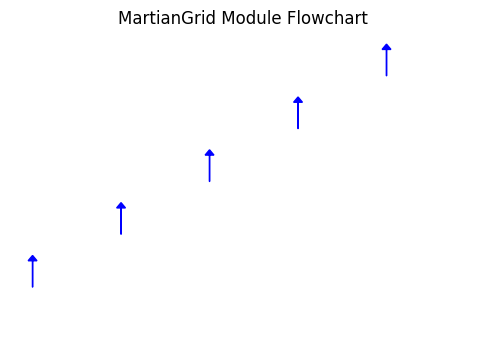

In [9]:
import matplotlib.pyplot as plt

# Define the flowchart
flowchart = {
    'Start': ['Initialize Grid'],
    'Initialize Grid': ['Place Object'],
    'Place Object': ['Get Object'],
    'Get Object': ['Remove Object'],
    'Remove Object': ['End'],
    'End': []  # Add the 'End' node
}

# Assign numerical indices to nodes
node_indices = {node: index for index, node in enumerate(flowchart)}

# Plot the flowchart
plt.figure(figsize=(6, 4))
for node in flowchart:
    for child in flowchart[node]:
        plt.arrow(node_indices[node], node_indices[child], 0, 0.5, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
        plt.text((node_indices[node] + node_indices[child]) / 2, node_indices[child], '', verticalalignment='center')
plt.xticks(list(node_indices.values()), list(node_indices.keys()))  # Set the x-axis ticks
plt.yticks(list(node_indices.values()), list(node_indices.keys()))  # Set the y-axis ticks
plt.box(False)
plt.axis('off')
plt.title('MartianGrid Module Flowchart')
plt.show()


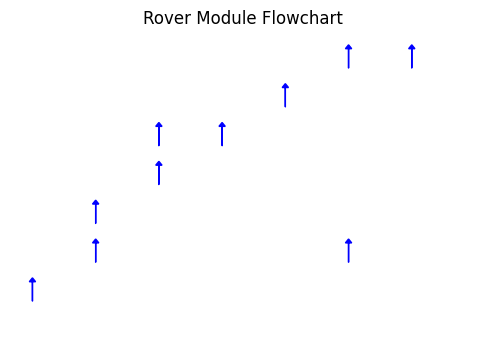

In [10]:
import matplotlib.pyplot as plt

# Define the flowchart for the Rover module
flowchart_rover = {
    'Start': ['Initialize Rover'],
    'Initialize Rover': ['Move to Target', 'Scan for Rocks'],
    'Move to Target': ['Collect Rock', 'Scan for Aliens'],
    'Scan for Rocks': ['Collect Rock'],
    'Scan for Aliens': ['Attack Alien'],
    'Collect Rock': ['Move to Target', 'End'],
    'Attack Alien': ['End'],
    'End': []  
}

# Assign numerical indices to nodes
node_indices_rover = {node: index for index, node in enumerate(flowchart_rover)}

# Plot the flowchart for the Rover module
plt.figure(figsize=(6, 4))
for node in flowchart_rover:
    for child in flowchart_rover[node]:
        plt.arrow(node_indices_rover[node], node_indices_rover[child], 0, 0.5, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
        plt.text((node_indices_rover[node] + node_indices_rover[child]) / 2, node_indices_rover[child], '', verticalalignment='center')
plt.xticks(list(node_indices_rover.values()), list(node_indices_rover.keys()))  # Set the x-axis ticks
plt.yticks(list(node_indices_rover.values()), list(node_indices_rover.keys()))  # Set the y-axis ticks
plt.box(False)
plt.axis('off')
plt.title('Rover Module Flowchart')
plt.show()


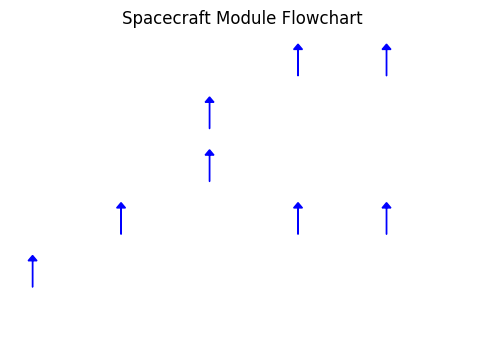

In [11]:
import matplotlib.pyplot as plt

# Define the flowchart for the Spacecraft module
flowchart_spacecraft = {
    'Start': ['Initialize Spacecraft'],
    'Initialize Spacecraft': ['Scan for Rovers'],
    'Scan for Rovers': ['Recharge Rover', 'Retrieve Rock'],
    'Recharge Rover': ['Scan for Rovers', 'End'],
    'Retrieve Rock': ['Scan for Rovers', 'End'],
    'End': []  
}

# Assign numerical indices to nodes
node_indices_spacecraft = {node: index for index, node in enumerate(flowchart_spacecraft)}

# Plot the flowchart for the Spacecraft module
plt.figure(figsize=(6, 4))
for node in flowchart_spacecraft:
    for child in flowchart_spacecraft[node]:
        plt.arrow(node_indices_spacecraft[node], node_indices_spacecraft[child], 0, 0.5, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
        plt.text((node_indices_spacecraft[node] + node_indices_spacecraft[child]) / 2, node_indices_spacecraft[child], '', verticalalignment='center')
plt.xticks(list(node_indices_spacecraft.values()), list(node_indices_spacecraft.keys()))  # Set the x-axis ticks
plt.yticks(list(node_indices_spacecraft.values()), list(node_indices_spacecraft.keys()))  # Set the y-axis ticks
plt.box(False)
plt.axis('off')
plt.title('Spacecraft Module Flowchart')
plt.show()


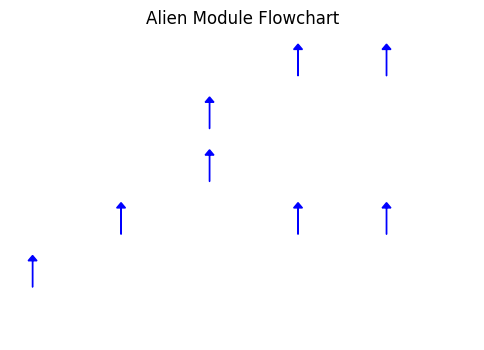

In [12]:
import matplotlib.pyplot as plt

# Define the flowchart for the Alien module
flowchart_alien = {
    'Start': ['Initialize Alien'],
    'Initialize Alien': ['Move Randomly'],
    'Move Randomly': ['Attack Rover', 'Hibernate'],
    'Attack Rover': ['Move Randomly', 'End'],
    'Hibernate': ['Move Randomly', 'End'],
    'End': []  
}

# Assign numerical indices to nodes
node_indices_alien = {node: index for index, node in enumerate(flowchart_alien)}

# Plot the flowchart for the Alien module
plt.figure(figsize=(6, 4))
for node in flowchart_alien:
    for child in flowchart_alien[node]:
        plt.arrow(node_indices_alien[node], node_indices_alien[child], 0, 0.5, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
        plt.text((node_indices_alien[node] + node_indices_alien[child]) / 2, node_indices_alien[child], '', verticalalignment='center')
plt.xticks(list(node_indices_alien.values()), list(node_indices_alien.keys()))  # Set the x-axis ticks
plt.yticks(list(node_indices_alien.values()), list(node_indices_alien.keys()))  # Set the y-axis ticks
plt.box(False)
plt.axis('off')
plt.title('Alien Module Flowchart')
plt.show()


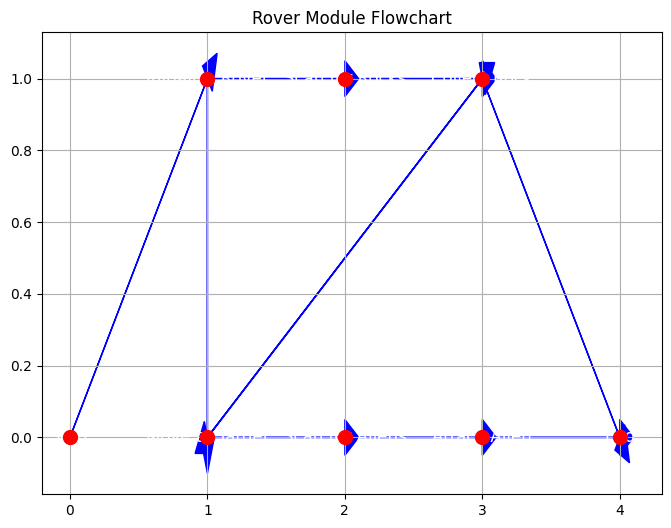

In [13]:
import matplotlib.pyplot as plt

# Define the flowchart for the Rover module
flowchart_rover = {
    'Start': ['Initialize Rover'],
    'Initialize Rover': ['Move to Target', 'Scan for Rocks'],
    'Move to Target': ['Collect Rock', 'Scan for Aliens'],
    'Scan for Rocks': ['Collect Rock'],
    'Scan for Aliens': ['Attack Alien'],
    'Collect Rock': ['Move to Target', 'End'],
    'Attack Alien': ['End'],
    'End': []  
}

# Assign coordinates to nodes
coordinates_rover = {
    'Start': (0, 0),
    'Initialize Rover': (1, 1),
    'Move to Target': (1, 0),
    'Scan for Rocks': (2, 1),
    'Scan for Aliens': (2, 0),
    'Collect Rock': (3, 1),
    'Attack Alien': (3, 0),
    'End': (4, 0)
}

# Plot the flowchart for the Rover module
plt.figure(figsize=(8, 6))
for node in flowchart_rover:
    for child in flowchart_rover[node]:
        plt.arrow(coordinates_rover[node][0], coordinates_rover[node][1], coordinates_rover[child][0] - coordinates_rover[node][0], coordinates_rover[child][1] - coordinates_rover[node][1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.scatter(*zip(*coordinates_rover.values()), s=100, c='red', zorder=5)
for node, (x, y) in coordinates_rover.items():
    plt.text(x, y, node, ha='center', va='center', fontsize=12, color='white')
plt.title('Rover Module Flowchart')
plt.grid(True)
plt.show()


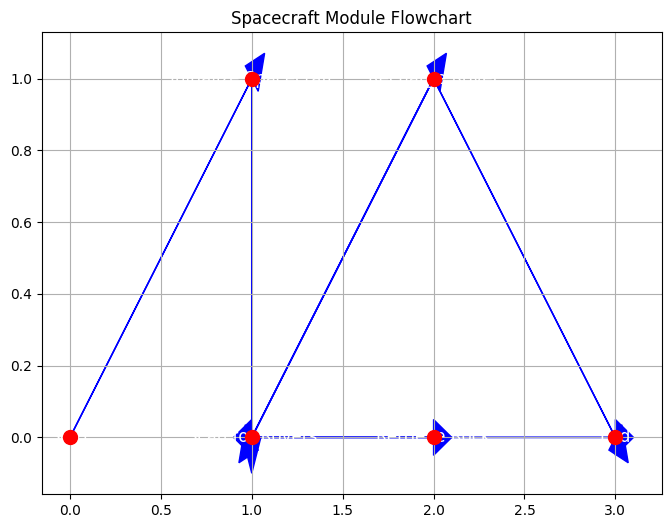

In [14]:
import matplotlib.pyplot as plt

# Define the flowchart for the Spacecraft module
flowchart_spacecraft = {
    'Start': ['Initialize Spacecraft'],
    'Initialize Spacecraft': ['Scan for Rovers'],
    'Scan for Rovers': ['Recharge Rover', 'Retrieve Rock'],
    'Recharge Rover': ['Scan for Rovers', 'End'],
    'Retrieve Rock': ['Scan for Rovers', 'End'],
    'End': []  
}

# Assign coordinates to nodes
coordinates_spacecraft = {
    'Start': (0, 0),
    'Initialize Spacecraft': (1, 1),
    'Scan for Rovers': (1, 0),
    'Recharge Rover': (2, 1),
    'Retrieve Rock': (2, 0),
    'End': (3, 0)
}

# Plot the flowchart for the Spacecraft module
plt.figure(figsize=(8, 6))
for node in flowchart_spacecraft:
    for child in flowchart_spacecraft[node]:
        plt.arrow(coordinates_spacecraft[node][0], coordinates_spacecraft[node][1], coordinates_spacecraft[child][0] - coordinates_spacecraft[node][0], coordinates_spacecraft[child][1] - coordinates_spacecraft[node][1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.scatter(*zip(*coordinates_spacecraft.values()), s=100, c='red', zorder=5)
for node, (x, y) in coordinates_spacecraft.items():
    plt.text(x, y, node, ha='center', va='center', fontsize=12, color='white')
plt.title('Spacecraft Module Flowchart')
plt.grid(True)
plt.show()


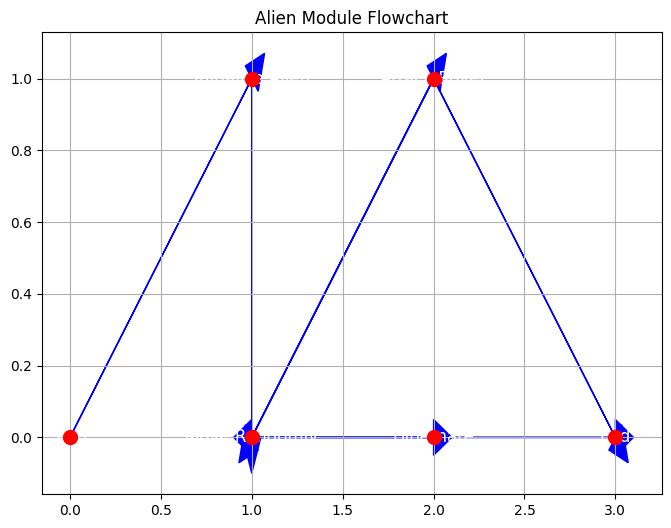

In [15]:
import matplotlib.pyplot as plt

# Define the flowchart for the Alien module
flowchart_alien = {
    'Start': ['Initialize Alien'],
    'Initialize Alien': ['Move Randomly'],
    'Move Randomly': ['Attack Rover', 'Hibernate'],
    'Attack Rover': ['Move Randomly', 'End'],
    'Hibernate': ['Move Randomly', 'End'],
    'End': []  
}

# Assign coordinates to nodes
coordinates_alien = {
    'Start': (0, 0),
    'Initialize Alien': (1, 1),
    'Move Randomly': (1, 0),
    'Attack Rover': (2, 1),
    'Hibernate': (2, 0),
    'End': (3, 0)
}

# Plot the flowchart for the Alien module
plt.figure(figsize=(8, 6))
for node in flowchart_alien:
    for child in flowchart_alien[node]:
        plt.arrow(coordinates_alien[node][0], coordinates_alien[node][1], coordinates_alien[child][0] - coordinates_alien[node][0], coordinates_alien[child][1] - coordinates_alien[node][1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.scatter(*zip(*coordinates_alien.values()), s=100, c='red', zorder=5)
for node, (x, y) in coordinates_alien.items():
    plt.text(x, y, node, ha='center', va='center', fontsize=12, color='white')
plt.title('Alien Module Flowchart')
plt.grid(True)
plt.show()


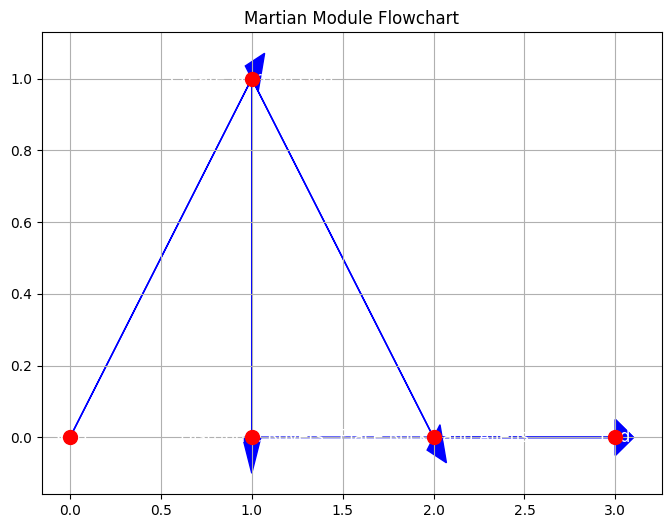

In [16]:
import matplotlib.pyplot as plt

# Define the flowchart for the Martian module
flowchart_martian = {
    'Start': ['Create Martian Grid'],
    'Create Martian Grid': ['Distribute Rovers', 'Place Rocks and Aliens'],
    'Distribute Rovers': ['End'],
    'Place Rocks and Aliens': ['End'],
    'End': []
}

# Assign coordinates to nodes
coordinates_martian = {
    'Start': (0, 0),
    'Create Martian Grid': (1, 1),
    'Distribute Rovers': (1, 0),
    'Place Rocks and Aliens': (2, 0),
    'End': (3, 0)
}

# Plot the flowchart for the Martian module
plt.figure(figsize=(8, 6))
for node in flowchart_martian:
    for child in flowchart_martian[node]:
        plt.arrow(coordinates_martian[node][0], coordinates_martian[node][1], coordinates_martian[child][0] - coordinates_martian[node][0], coordinates_martian[child][1] - coordinates_martian[node][1], head_width=0.1, head_length=0.1, fc='blue', ec='blue')
plt.scatter(*zip(*coordinates_martian.values()), s=100, c='red', zorder=5)
for node, (x, y) in coordinates_martian.items():
    plt.text(x, y, node, ha='center', va='center', fontsize=12, color='white')
plt.title('Martian Module Flowchart')
plt.grid(True)
plt.show()
